In [1]:
import cv2 as cv 
import matplotlib.pyplot as plt
import numpy as np

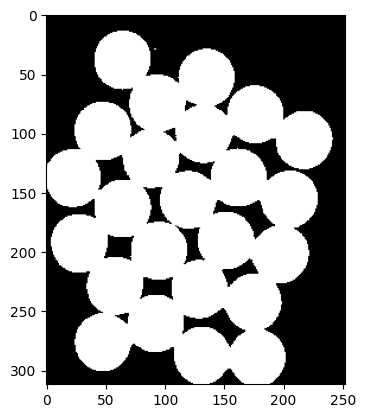

In [84]:
img = cv.imread('./data/coins.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(thresh, cmap="gray")

In [85]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
 
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
 
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
 
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

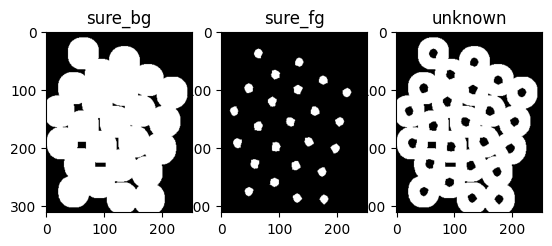

In [86]:
plt.subplot(1,3,1); plt.title("sure_bg"); plt.imshow(sure_bg, cmap="gray")
plt.subplot(1,3,2); plt.title("sure_fg"); plt.imshow(sure_fg, cmap="gray")
plt.subplot(1,3,3); plt.title("unknown"); plt.imshow(unknown, cmap="gray")

In [87]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
 
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
 
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [88]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

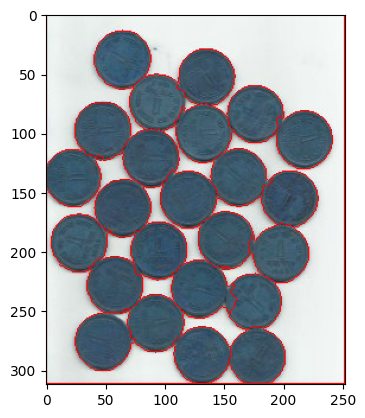

In [89]:
plt.imshow(markers)
plt.imshow(img)

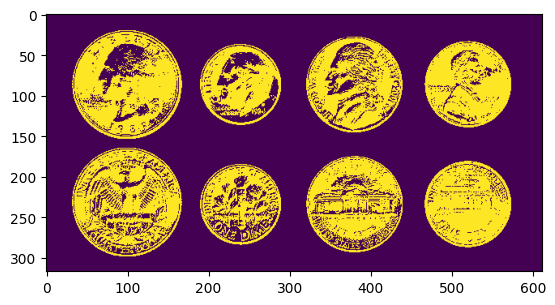

In [46]:
img = cv.imread("./data/coin.jpg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
_, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

plt.imshow(thresh)

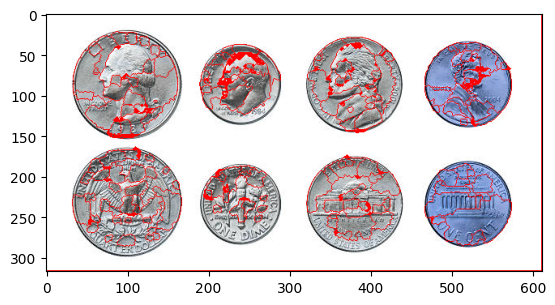

In [80]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
 
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=30)
 
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
#_, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
_, sure_fg = cv.threshold(dist_transform,0.0*dist_transform.max(),10,0)
 
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
 
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
 
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.imshow(img)

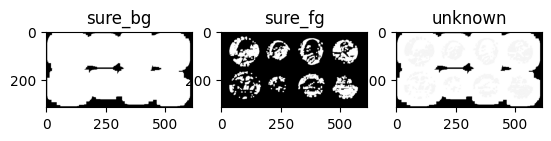

In [81]:
plt.subplot(1,3,1); plt.title("sure_bg"); plt.imshow(sure_bg, cmap="gray")
plt.subplot(1,3,2); plt.title("sure_fg"); plt.imshow(sure_fg, cmap="gray")
plt.subplot(1,3,3); plt.title("unknown"); plt.imshow(unknown, cmap="gray")

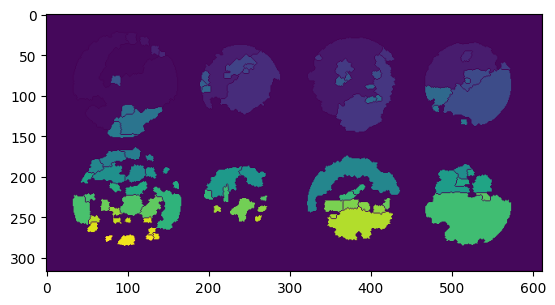

In [82]:
plt.imshow(markers)